# Расчет и построение графика тягового баланса автомобиля

Целью тягового расчета автомобиля является определение эксплуатационных возможностей автомобиля до его изготовления. Возможности оценки поведения автомобиля в различных условиях эксплуатации. Он включает расчет и построение графиков тягового и мощностного балансов, динамического фактора, ускорений, времени и пути разгона, экономических показателей таких как удельный и путевой расход топлива в зависимости от скорости автомобиля.

In [1]:
import numpy as np

Задача расчета: рассчитать и построить график тягового баланса автомобиля по передачам в зависимости от скорости движения и частоты вращения коленчатого вала.

При построении исходят из уравнения тягового баланса при установившемся движении:

$ P_k = \frac{M_e * i_0 * i_k * n_{TP}}{r_k} $ - тяговое усилие на ведущих колёсах, Н
 
$ v = 0.377 * \frac{r_k * n}{i_0 * i_k} $ - Cкорость движения автомобиля на всех передачах

Минимальные обороты двигателя (n) равны 800, передаточное число главной передачи $ i_0 = 3.85 $, радиус качения колеса $ r_k = 0,3 $ м, мощность двигателя 85 л.c, КПД трансмиссии 0,92, номинальные обороты двигателя 5600. Рассчитаем тяговое усилие с шагом n = 200 до n = 6400

Сначала найдём передаточные числа промежуточных передач (2, 3, 4):

$ i_j = i_0 * D^{\frac{j-1}{1-N}} $

где j - номер передачи, N - число передач, D - диапазон передаточных чисел, для 4 ступенчатой КПП принимаем 4

In [2]:
pred = np.array([])
i0 = 3.85
N = 4
j = 1

while j <= N:
    ij = i0 * 4 ** ((j - 1) / (1 - N))
    pred = np.append(pred, ij)
    j += 1

$M_e$(крутящий момент) находится из формулы мощности двигателя:

$ N_m = \frac{Me * N_e}{9550}(кВТ) $

где $ N_e = \frac{N_m * n}{n_N} * | a_1 + \frac{a_2 * n}{n_N} - (\frac{n}{n_N})^2 | $ , 

$ a_1 = 0.5, a_2 = 1.5, n_N $ - номинальные обороты

In [3]:
Nm = 85 / 1.36
a1 = 0.5
a2 = 1.5
nN = 5600
n = 800
rk = 0.3
ntp = 0.92
nmax = 6400

tyaga = np.array([])
speed = np.array([])

for j, item in enumerate(pred):
    n = 800
    while n < nmax:
        
        v = 0.377 * (rk * n) / (i0 * item)
        speed = np.append(speed, v)

        Ne = (((Nm * n) / nN) * abs(a1 + ((a2 * n) / nN) - (n/nN) ** 2))
        Me = (9550 * Ne) / n
        Pk = (Me * i0 * item * ntp)/ rk
        
        tyaga = np.append(tyaga, Pk)
        n += 200

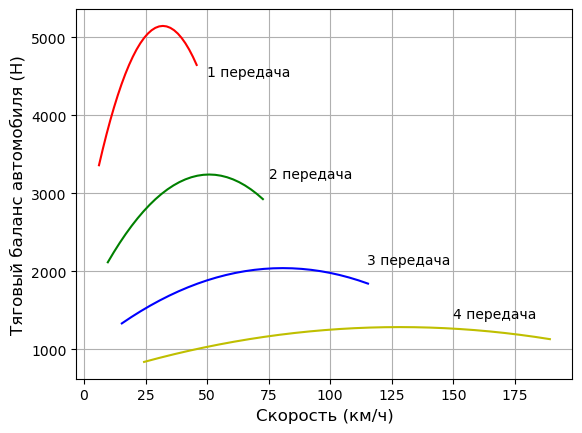

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Скорость (км/ч)', fontsize=12, color='black')
plt.ylabel('Тяговый баланс автомобиля (Н)', fontsize=12, color='black')

plt.grid(True)
plt.text(50, 4500, '1 передача')
plt.text(75, 3200, '2 передача')
plt.text(115, 2100, '3 передача')
plt.text(150, 1400, '4 передача')

plt.plot(speed[:27], tyaga[:27], '-r', speed[28:55], tyaga[28:55], '-g', speed[56:83], tyaga[56:83], '-b', speed[84:112], tyaga[84:112], '-y')